<a href="https://colab.research.google.com/github/Jorge-Aldana/FundamentosMatematicasIA/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<h2>Taller Aplicaciones de Álgebra Lineal con Python </h2>


---


**Fundamentos de Matemáticas para IA**

**Especialización en Inteligencia Artificial**

**Pontificia Universidad Javeriana**

Tiempo estimado: **2** horas

<h2>Tabla de contenidos</h2>
<div style="margin-top: 20px">
    <ul>
        <li>
            <a href="#tensores">Tensores</a>
        </li>
        <li>
            <a href="#aritmetica">Aritmética de tensores</a>
        </li>
        <li>
            <a href="#inversa">Inversa de una matriz</a>
        </li>
        <li>
            <a href="#sistemas">Sistemas de ecuaciones</a>
        </li>
        <li>
            <a href="#traslaciones">Traslaciones</a>
        </li>
        <li>
            <a href="#valores">Valores propios</a>
        </li>
        <li>
            <a href="#soporte">Clasificación con máquinas de vectores de soporte</a>
        </li>
    </ul>

</div>

<hr>



<h2>Objetivos</h2>

Después de completar este taller, será capaz de:
*   Utilizar las herramientas en Python para el manejo de Matrices y vectores, tensor y sistemas de ecuaciones.
*   Aplicar los algoritmos del algebra lineal para solucionar sistemas de ecuaciones asociados a problemas de IA.





## Tensores  <a name="tensores"></a>

Las librerias que vamos a usar:

In [ ]:
import numpy as np
import tensorflow as tf


El concepto de tensor es muy general. Así, un escalar estará representado por un tensor con justamente $1$ elemento:

In [ ]:
tensor_rango_0 = tensorflow.constant(5)
print(tensor_rango_0)

NameError: name 'tensorflow' is not defined

Consideremos dos matrices $\mathbf{A} \in \mathbb{R}_{n,k}$ y $\mathbf{B} \in \mathbb{R}_{n,k}$,
\begin{equation}
\mathbf{A}=\begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1k}\\
a_{21} & a_{22} & \cdots & a_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix},\qquad\mathbf{B}=\begin{bmatrix}b_{11} & b_{12} & \cdots & b_{1k}\\
b_{21} & b_{22} & \cdots & b_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
b_{n1} & b_{n2} & \cdots & b_{nk}
\end{bmatrix}.
\end{equation}
$\mathbf{A}$ y $\mathbf{B}$ tienen $n$ filas y $k$ columnas. Las matrices son tensores con 2 ejes.

Los vectores son tensores con un eje:

In [ ]:
tensor_rango_1 = tensorflow.constant([2.0, 3.0, 4.0])
print(tensor_rango_1)

**Ejercicio.** Imprimir una matriz $2 \times 2$ utilizando TensorFlow.

**Ejercicio.** Imprimir cinco vectores unitarios utilizando TensorFlow.

Vamos a imprimir un tensor con 3 ejes de 30 entradas.

In [ ]:
tensor_rango_3 = numpy.arange(30).reshape(3,2,5)

tensor_rango_3 = tensorflow.constant(tensor_rango_3)

tensor_rango_3

<tf.Tensor: shape=(3, 2, 5), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])>

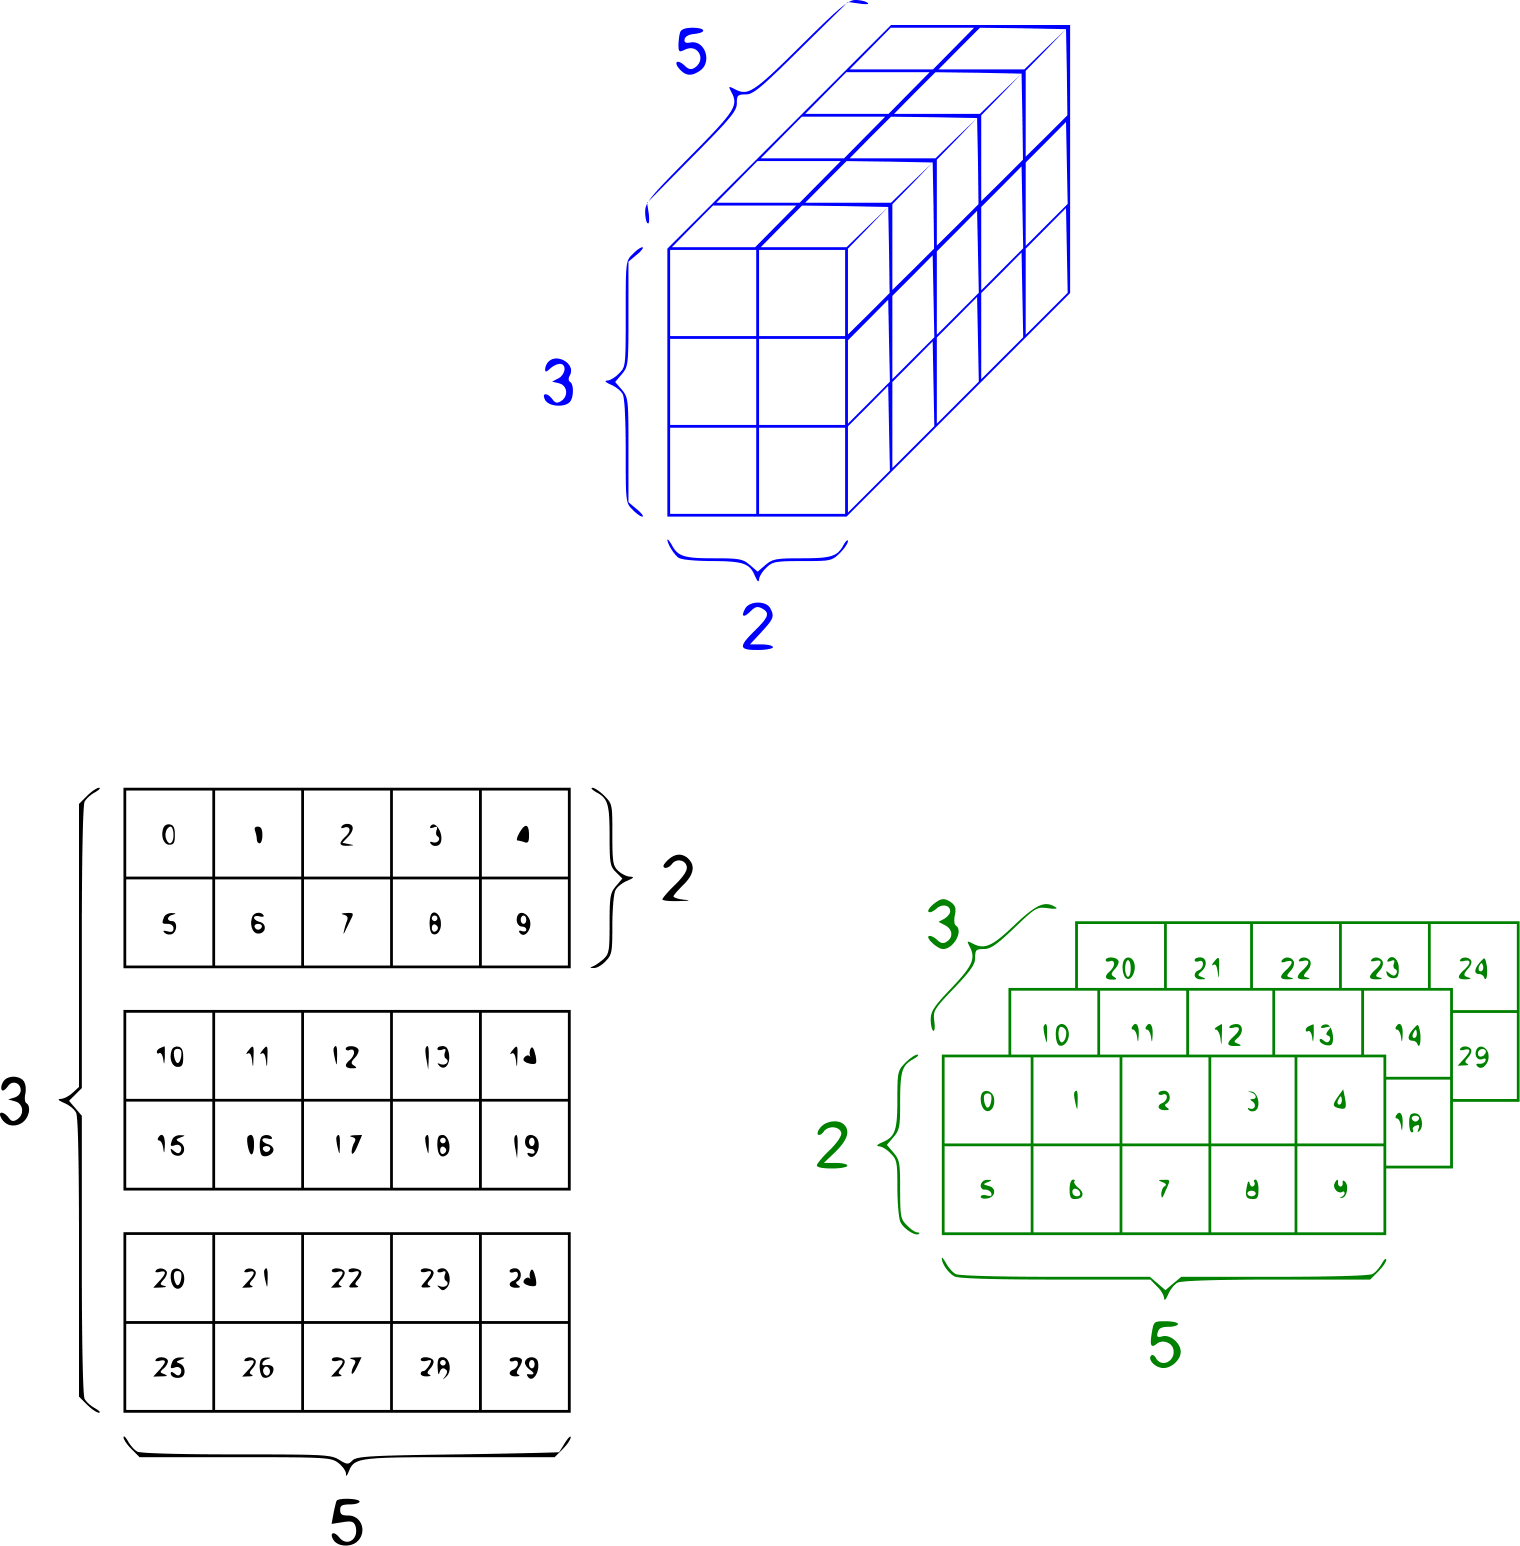

## Aritmética de tensores  <a name="aritmetica"></a>

Calculemos el producto matricial
$$\mathbf{A}\mathbf{B},\qquad
\mathbf{A} = \begin{bmatrix}1 & 4 & 7\\
2 & 5 & 8
\end{bmatrix},\quad \mathbf{B} = \begin{bmatrix}1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix},$$
utilizando la librería Numpy.

In [ ]:
m1 = numpy.array([[1,4,7],[2,5,8]])
m2 = numpy.array([[1,4],[2,5],[3,6]])
m3 = numpy.dot(m1,m2)
print(m3)

[[30 66]
 [36 81]]


¿Qué sucede si hacemos el producto $\mathbf{B}\mathbf{A}$?

In [ ]:
m4 = numpy.dot(m2,m1)
print(m4)

[[ 9 24 39]
 [12 33 54]
 [15 42 69]]


Nótese que $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$.

**Ejercicio.** Multiplicar las siguientes matrices:
Consideremos un problema de rocío con pesticidas de agronomía. Ubiquemos la cantidad de pesticida en miligramos como $a_{ij}$ en una matriz, donde $i$ es el número del tipo de pesticida y $j$ la planta a que pertence. Digamos $$\mathbf{A}=\begin{bmatrix}1 & 3 & 4 & 6\\ 2 & 2 & 5 & 5\\ 3 & 1 & 6 & 4 \end{bmatrix}.$$ Aquí, por ejemplo, la entrada $a_{22} = 2$ (fila 2, columna 2) dice que hay dos miligramos de pesticida del tipo 2 en la planta 2.

Por otro lado, consideremos la matriz $\mathbf{B}$ cuyas entradas $b_{ij}$ son la cantidad de plantas de la planta número $i$ y $j$ el número de clase del herbívoro. $$\mathbf{B}=\begin{bmatrix}7 & 9 & 10\\ 8 & 8 & 11\\ 9 & 7 & 12 \end{bmatrix}.$$ Aquí la entrada $b_{12} = 9$ quiere decir según la fila el número de la planta, en este caso 1, y según la columna la clase de herbívoro, en este caso clase 2.

Para hallar la cantidad de pesticida del tipo $i$ que ha absorbido el animal de clase $j$, hacer el producto de las matrices $\mathbf{A}$ y $\mathbf{B}$.

Por su parte, el producto de Hadamard se hace con matrices de las mismas dimensiones. Digamos $$\begin{bmatrix}1 & 4 & 7\\ 2 & 5 & 8 \end{bmatrix}*\begin{bmatrix}2 & 8 & 14\\ 4 & 10 & 16 \end{bmatrix}.$$ Este se calcula de la siguiente manera:

In [ ]:
m1 = numpy.array([[1,4,7],[2,5,8]])
m3 = numpy.array([[2,8,14],[4,10,16]])
m4 = m1*m3
print(m4)

[[  2  32  98]
 [  8  50 128]]


**Ejercicio.** Calcular el producto de Hadamard para
Una empresa tiene una matriz $2 \times 2$ donde reune los salarios de cuatro trabajadores. La fila indica el área en que se encuentran y la columna la especialidad. Por otro lado, otra matriz $2 \times 2$ reune los porcentajes de incremento de los salarios para el año siguiente. Con el producto de Hadamard, hallar los respectivos incrementos.

Salarios: 100 especialidad clínica área atención al cliente, 200 especialidad ocupacional área atención al cliente, 300 especialidad clínica área primeros auxilios, 400 especialidad atención al cliente área primeros auxilios.

Porcentajes: 0.2, 0.3, 0.2, 0.3.

## Inversa de una matriz  <a name="inversa"></a>

El sistema de ecuaciones lineales $$\left\{ \begin{array}{c} a_{1,1}x_{1}+a_{1,2}x_{2}+\cdots+a_{1,n}x_{n}=b_{1}\\ a_{2,1}x_{1}+a_{2,2}x_{2}+\cdots+a_{2,n}x_{n}=b_{2}\\ \vdots\\ a_{m,1}x_{1}+a_{m,2}x_{2}+\cdots+a_{m,n}x_{n}=b_{m} \end{array}\right.$$
se puede escribir con
$$\mathbf{A}=\begin{bmatrix}a_{1,1} & a_{1,2} & \cdots & a_{1,n}\\ a_{2,1} & a_{2,2} & \cdots & a_{2,n}\\ \cdots & \cdots & \cdots & \cdots\\ a_{m,1} & a_{m,2} & \cdots & a_{m,n} \end{bmatrix},\quad\mathbf{x}=\begin{bmatrix}x_{1}\\ x_{2}\\ \vdots\\ x_{n} \end{bmatrix},\quad\mathbf{b}=\begin{bmatrix}b_{1}\\ b_{2}\\ \vdots\\ b_{m} \end{bmatrix}.$$ Su solución está dada por $$\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.$$ De aquí la importancia de la inversa de una matriz.

**Observación.** Recuérdese que no todas las matrices son invertibles.

Ahora calculemos la matriz inversa de $$\mathbf{A} = \begin{bmatrix}6 & 17\\
332 & 4
\end{bmatrix}.$$

In [ ]:
x = numpy.array([[6,17],[332,4]])
y = numpy.linalg.inv(x)
y

array([[-0.00071174,  0.00302491],
       [ 0.05907473, -0.00106762]])

La matriz que se obtuvo es $$\mathbf{A}^{-1} \approx \begin{bmatrix}-0.00071174 & 0.00302491\\
0.05907473 & -0.00106762
\end{bmatrix}.$$
Ahora hacemos el producto $\mathbf{A}\mathbf{A}^{-1}$.

In [ ]:
numpy.dot(x,y)

array([[ 1.00000000e+00, -3.03576608e-18],
       [ 0.00000000e+00,  1.00000000e+00]])

El producto nos da una aproximación a la matriz identidad. No es exacto, porque se trata de un cálculo computacional aproximado.

**Ejercicio.** Hallar la inversa de $$\mathbf{M} = \begin{bmatrix}7 & 17\\
37 & 47
\end{bmatrix}.$$ Calcular el producto $\mathbf{M}\mathbf{M}^{-1}$.

**Ejercicio.** Considere la matriz $$a_{ij}=\begin{cases} 2i, & \text{cuando $j=1$ y $i=1,2,\dots,80,$}\\ 0.5i, & \text{cuando $\begin{cases} j=i+2\wedge i=1,2,\dots,78,\\ j=i-2\wedge i=3,4,\dots,80, \end{cases}$}\\ 0.25i, & \text{cuando $\begin{cases} j=i+4\wedge i=1,2,\dots,76,\\ j=i-4\wedge i=5,6,\dots,80, \end{cases}$}\\ 0, & \text{en cualquier otro caso.} \end{cases}.$$ Aquí $\wedge$ es el símbolo para la conjunción y.

Hallar la matriz inversa de $\mathbf{A}$.

## Sistemas de ecuaciones <a name="sistemas"></a>

**Ejercicio.** Resolver el sistema $$\begin{cases} 2x_{1}+3x_{2}, & =0,\\ 6x_{1}-5x_{2}+7x_{3}, & =5,\\ x_{2}+x_{3}, & =10. \end{cases}$$

¿Recomendaría utilizar el método de Gauss-Jordan o la inversa de una matriz?.

**Ejercicio.** Completar el procedimiento \begin{align*} T_{1} & =\frac{60+100+T_{2}+T_{3}}{4} & & \Rightarrow\quad 4T_{1}-T_{2}-T_{3}=160\\ T_{2} & =\frac{T_{1}+100+40+T_{4}}{4} & & \Rightarrow\\ T_{3} & =\frac{60+T_{1}+T_{4}+0}{4} & & \Rightarrow\\ T_{4} & =\frac{T_{3}+T_{2}+40+0}{4} & & \Rightarrow \end{align*} Resolver el sistema de ecuaciones lineales resultante que envuelve temperaturas en una placa.

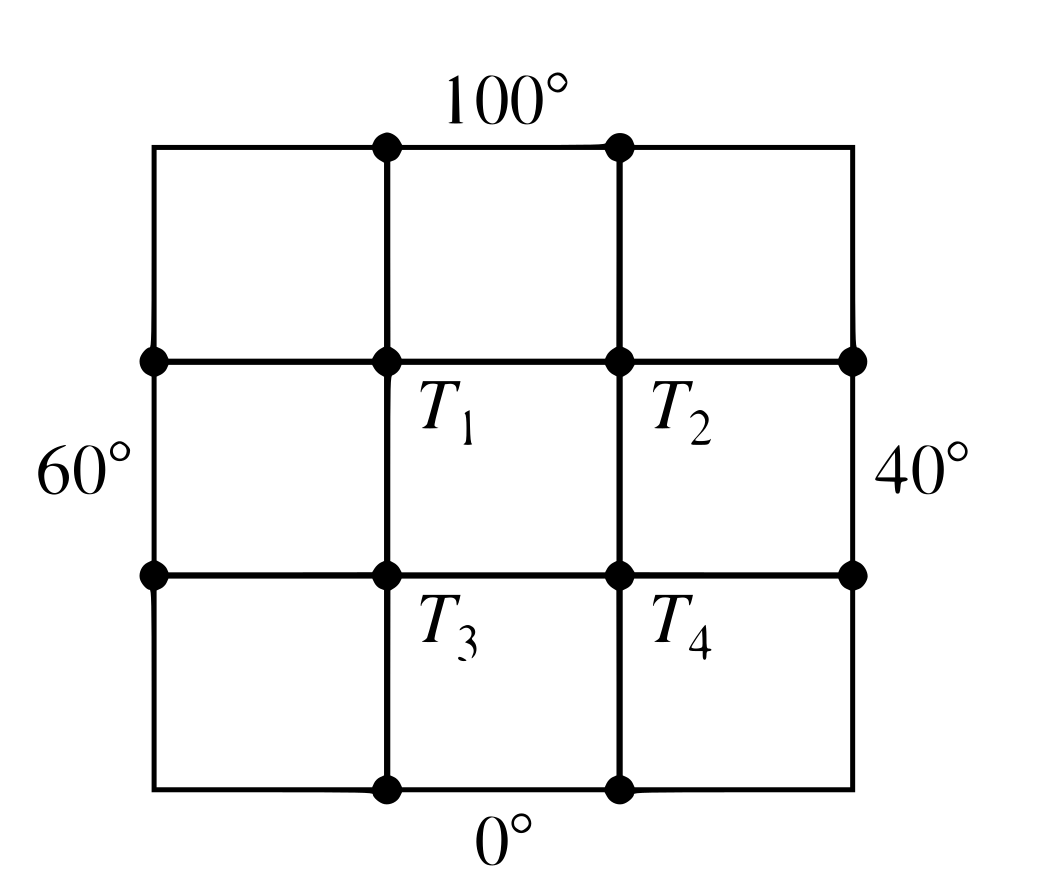

## Translaciones <a name="traslaciones"></a>

Consideremos la siguiente figura:

In [ ]:
import matplotlib.pyplot as plt

aux = numpy.ones((100, 100), dtype=int)
src = numpy.vstack([numpy.c_[aux, 2*aux], numpy.c_[3*aux, 4*aux]])
plt.imshow(src)
plt.show()

NameError: name 'numpy' is not defined

Ahora la queremos rotar 45 grados con la transformación lineal $$\begin{bmatrix}\cos2\alpha & \sin2\alpha\\ \sin2\alpha & -\cos2\alpha \end{bmatrix}.$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

alpha = np.pi/4
a = np.array([[numpy.cos(2*alpha), numpy.sin(2*alpha)],
              [numpy.sin(2*alpha), -numpy.cos(2*alpha)]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

NameError: name 'numpy' is not defined

**Ejercicio.** Hacer lo mismo con la transformación $$\begin{bmatrix}\cos\alpha & \sin\alpha\\ \sin\alpha & -\cos\alpha \end{bmatrix}.$$ ¿Cuál resultado se obtiene?

## Valores propios <a name="valores"></a>

Los valores propios sirven para diagonalizar una matriz, es decir, transformar una matriz en otra que tenga ceros fuera de la diagonal. Por ejemplo:

In [ ]:
alpha = numpy.array([[1,4,7],[2,5,8]]) # matriz alpha

NameError: name 'numpy' is not defined

In [ ]:
numpy.diag(numpy.diag(alpha)) # matriz diagonal, usando numpy.diag()

array([[1, 0],
       [0, 5]])

Diagonalizar una matriz permite que los cálculos que debe realizar el computador en las operaciones disminuyan.

**Ejercicio.** Colocando %%time como primera línea de código de la celda, realizar el producto $\mathbf{C}^{10}$ para alguna matriz $10 \times 10$. En otra celda de código hacer el mismo ejercicio pero con la matriz diagonal. Comparar los tiempos de cada celda de código, ¿cuál método es más rápido?

## Clasificación con máquinas de vectores de soporte <a name="soporte"></a>

Consideremos la función $$f: \mathbb{R}^n \rightarrow \mathbb{R}$$ dada por $$\mathbf{x} \mapsto \mathbf{w}\boldsymbol{\cdot}\mathbf{x} + b,$$ donde $\mathbf{w} \in \mathbb{R}^n$ y $b \in \mathbb{R}$ son parámetros (valores que asignamos arbitrariamente y que quedan fijos). El plano que hace la clasificación binaria es $$\{\mathbf{x} \in \mathbb{R}^n \mid f(\mathbf{x}) = 0\}.$$ Esto es, los puntos en los cuales la función se anula. Así, la clasificación viene determinada por $$g(\mathbf{x}_{k})=\begin{cases} 1 & \text{si $\mathbf{w}\boldsymbol{\cdot}\mathbf{x}_{k}+b\geq0$},\\ 0 & \text{si $\mathbf{w}\boldsymbol{\cdot}\mathbf{x}_{k}+b<0$}. \end{cases}$$

Importamos nuevas librerías, sobre todo para las gráficas

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

Vamos a usar un conjunto de datos de la nube

In [ ]:

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=20, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn');

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

Dibujamos distintos vectores de soporte

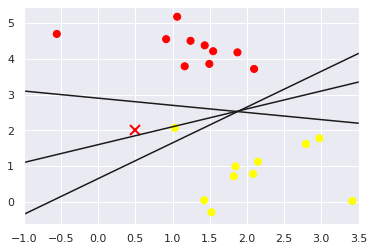

In [ ]:
xfit = numpy.linspace(-1, 3.5) # dominio de las líneas
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.5], [2], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

**Ejercicio.** Hallar un nuevo vector de soporte para la muestra del conjunto de datos.